<a href="https://colab.research.google.com/github/AishlyManglani/Data-Mining-Assignments/blob/main/dimensionality%20reduction/image_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.5 MB/s eta 0:00:00


In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA, FactorAnalysis
from sklearn.manifold import TSNE, Isomap, MDS, LocallyLinearEmbedding
import umap
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense


In [3]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X_mnist, y_mnist = mnist.data, mnist.target

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
# Reduce dataset size
subset_size = 2000  # Adjust subset size to fit Colab RAM
X_mnist = X_mnist[:subset_size]
y_mnist = y_mnist[:subset_size]

# Standardize the data
scaler = StandardScaler()
X_mnist_scaled = scaler.fit_transform(X_mnist)

In [7]:
# Function to visualize reduced data
def plot_2D(X, y, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y.astype(int), cmap='tab10', alpha=0.7)
    plt.colorbar(scatter)
    plt.title(title)
    plt.show()

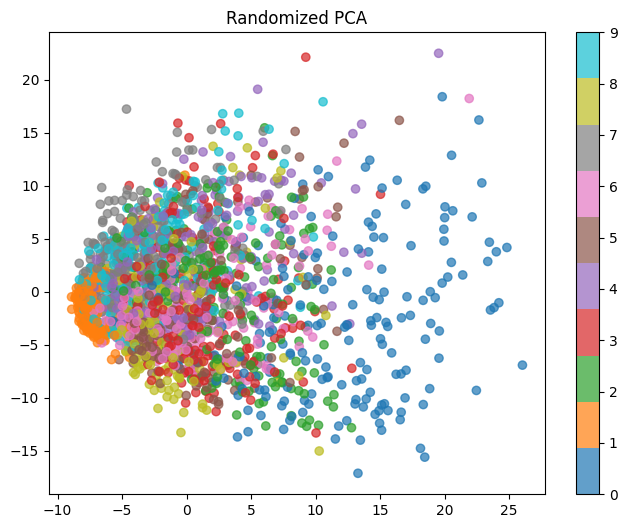

In [8]:

# Randomized PCA
pca_rand = PCA(n_components=2, svd_solver='randomized')
X_pca_rand = pca_rand.fit_transform(X_mnist_scaled)
plot_2D(X_pca_rand, y_mnist, "Randomized PCA")

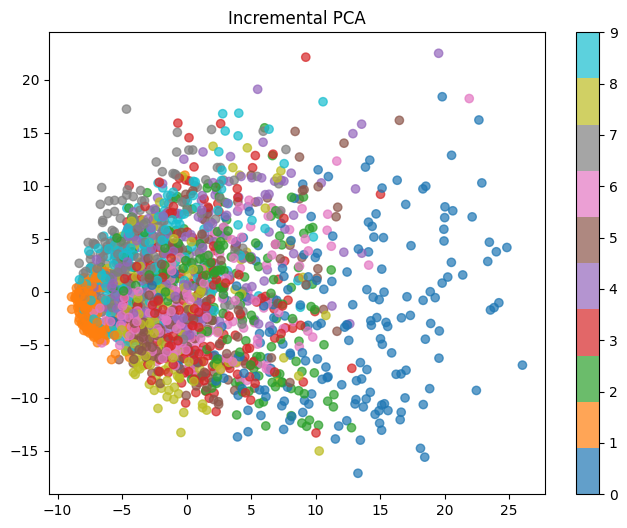

In [9]:
# Incremental PCA
ipca = IncrementalPCA(n_components=2)
X_ipca = ipca.fit_transform(X_mnist_scaled)
plot_2D(X_ipca, y_mnist, "Incremental PCA")

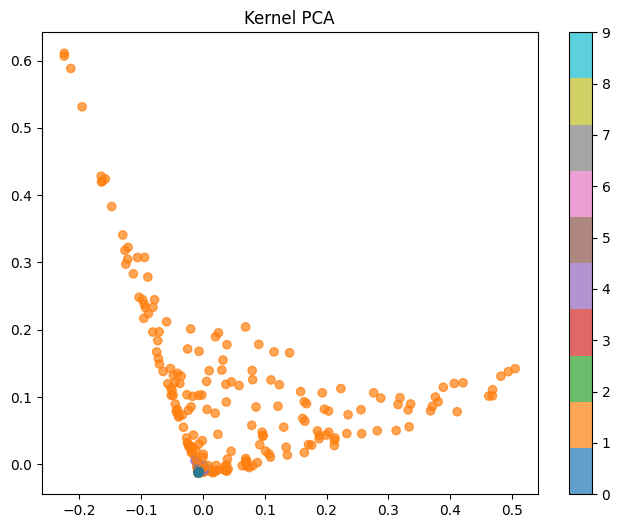

In [10]:
# Kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.03)
X_kpca = kpca.fit_transform(X_mnist_scaled)
plot_2D(X_kpca, y_mnist, "Kernel PCA")

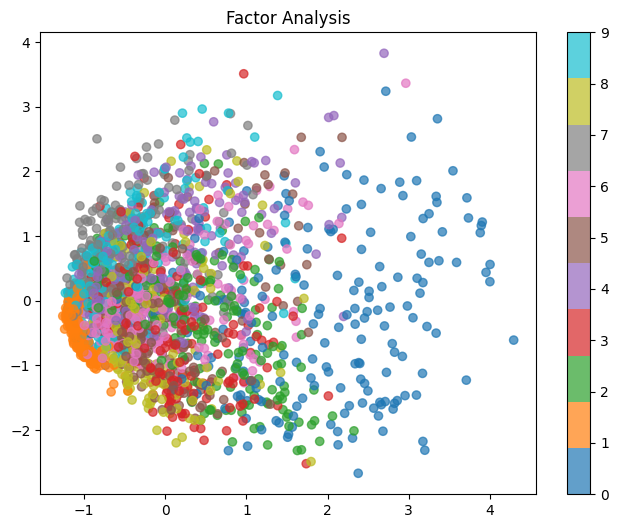

In [11]:
# Factor Analysis
fa = FactorAnalysis(n_components=2)
X_fa = fa.fit_transform(X_mnist_scaled)
plot_2D(X_fa, y_mnist, "Factor Analysis")

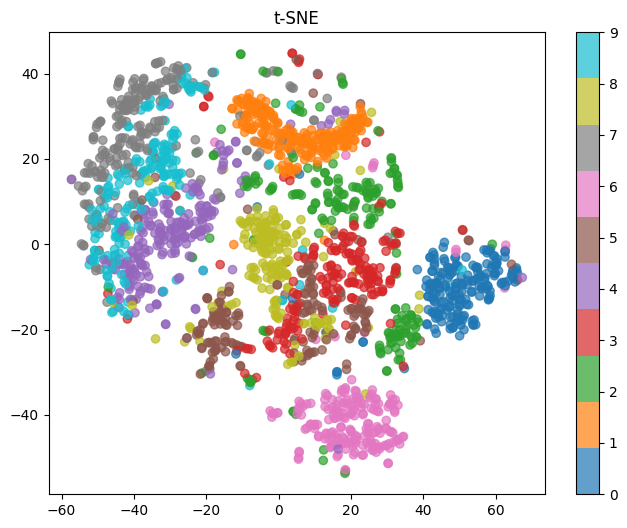

In [12]:
# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_mnist_scaled)
plot_2D(X_tsne, y_mnist, "t-SNE")

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


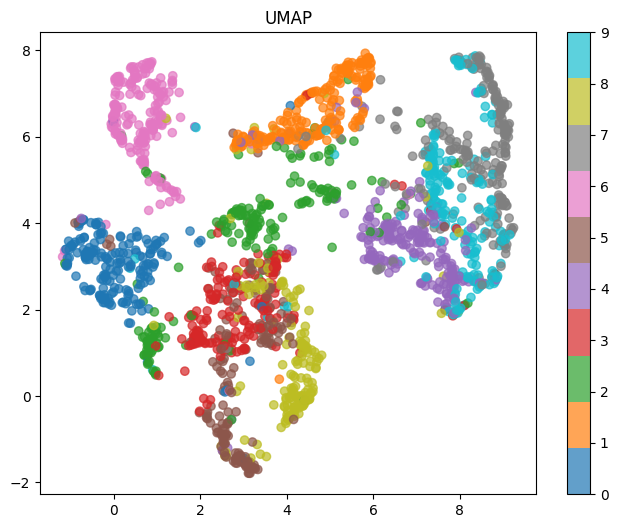

In [13]:
# UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_mnist_scaled)
plot_2D(X_umap, y_mnist, "UMAP")

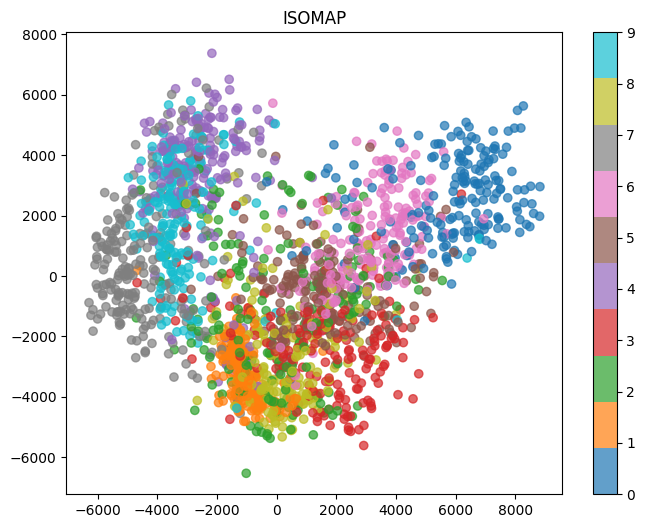

In [14]:

# ISOMAP
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_mnist)
plot_2D(X_isomap, y_mnist, "ISOMAP")

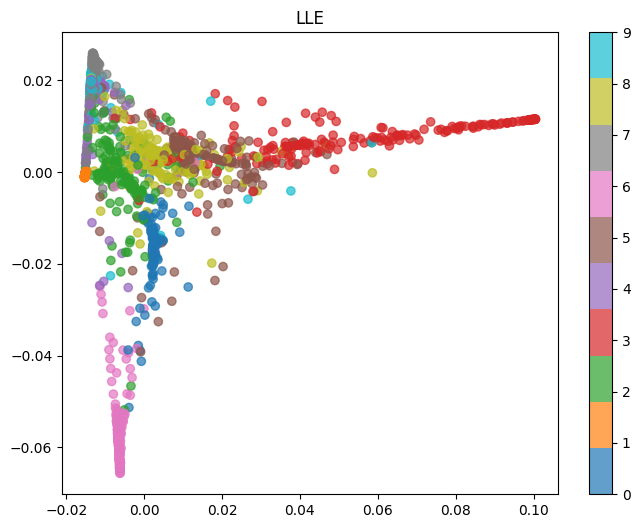

In [15]:
# LLE
lle = LocallyLinearEmbedding(n_components=2)
X_lle = lle.fit_transform(X_mnist)
plot_2D(X_lle, y_mnist, "LLE")

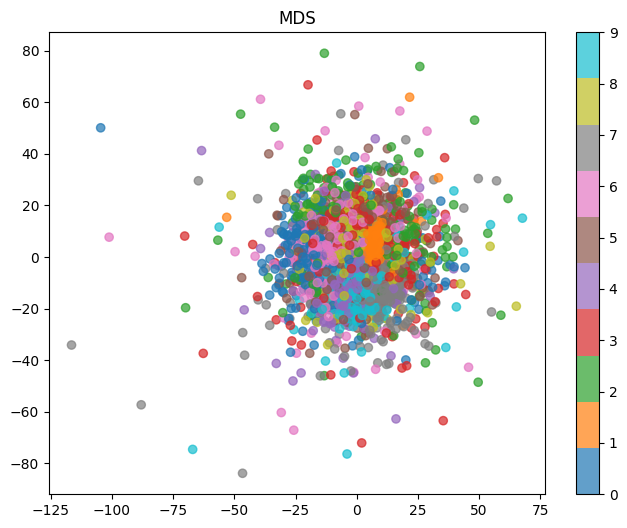

In [17]:
# MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_mnist_scaled)
plot_2D(X_mds, y_mnist, "MDS")

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 321ms/step - loss: 1.0405
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.9910
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8350 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7753 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8175 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8114 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7745 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7747 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7904 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7737 


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


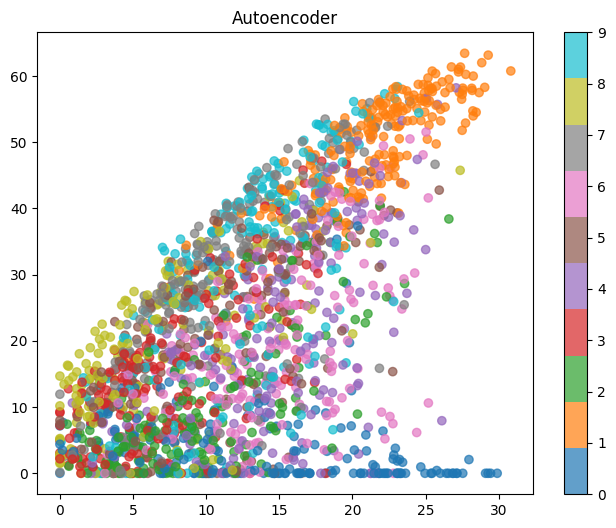

In [23]:
from tensorflow.keras import layers, models

# Define the input layer
input_dim = X_mnist_scaled.shape[1]
encoding_dim = 2

input_layer = layers.Input(shape=(input_dim,))

# Define the hidden layers and encoder layer
hidden_layer_1 = layers.Dense(128, activation='relu')(input_layer)
hidden_layer_2 = layers.Dense(64, activation='relu')(hidden_layer_1)
encoder_layer = layers.Dense(encoding_dim, activation='relu', name='encoder_layer')(hidden_layer_2)

# Define the decoder layers
hidden_layer_3 = layers.Dense(64, activation='relu')(encoder_layer)
hidden_layer_4 = layers.Dense(128, activation='relu')(hidden_layer_3)
output_layer = layers.Dense(input_dim, activation='sigmoid')(hidden_layer_4)

# Create the autoencoder model
autoencoder = models.Model(inputs=input_layer, outputs=output_layer)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_mnist_scaled, X_mnist_scaled, epochs=10, batch_size=256, shuffle=True, verbose=1)

# Extract the encoder part using Functional API
encoder = models.Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('encoder_layer').output)

# Transform the data using the encoder
X_auto = encoder.predict(X_mnist_scaled)

# Visualize the reduced data
plot_2D(X_auto, y_mnist, "Autoencoder")


